In [1]:
import pandas as pd
import geopandas as gpd
import geopandas
from datetime import datetime
import numpy as np
import shapely.geometry as sgeom
from shapely.geometry import Point, LineString


from local_module import feature_distance#, MapTemplate

In [2]:
def lat_lon_2_float(v):
    '''
    Convert strings from NHC to float location
    '''
    multiplier = 1
    if (v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    return float(v[:-1]) * multiplier
    

In [3]:
data = []
with open('HURDAT.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            header       = line.split(',')
            storm_ID     = header[0].strip()
            storm_name   = header[1].strip()
        else:
            data_line       = line.split(',')
            dt              = datetime.strptime(data_line[0] + data_line[1], '%Y%m%d %H%M')
            record_identier = data_line[2]
            storm_status    = data_line[3].strip()
            storm_lat       = lat_lon_2_float(data_line[4].strip())
            storm_lon       = lat_lon_2_float(data_line[5].strip())
            max_wind        = float(data_line[6].strip()) * 1.852
            minimun_press   = float(data_line[7].strip())
            
            ne_34kt = float(data_line[8].strip())
            se_34kt = float(data_line[9].strip())
            sw_34kt = float(data_line[10].strip())
            nw_34kt = float(data_line[11].strip())
            
            ne_50kt = float(data_line[12].strip())
            se_50kt = float(data_line[13].strip())
            sw_50kt = float(data_line[14].strip())
            nw_50kt = float(data_line[15].strip())
            
            ne_60kt = float(data_line[16].strip())
            se_60kt = float(data_line[17].strip())
            sw_60kt = float(data_line[18].strip())
            nw_60kt = float(data_line[19].strip())  
            
            data.append([dt, record_identier, storm_ID, storm_name, storm_status, storm_lat, storm_lon,
                         max_wind, minimun_press, ne_34kt, se_34kt, sw_34kt, nw_34kt,
                                                  ne_50kt, se_50kt, sw_50kt, nw_50kt,
                                                  ne_60kt, se_60kt, sw_60kt, nw_60kt])

In [4]:
df = pd.DataFrame(data, columns = [
                                   'Time', 'Record Identifier', 'Storm ID', 'Storm Name', 'Storm Status', 
                                   'Lat', 'Lon', 'Max Wind', 'Minimun Pressure', 
                                   'NE 34kt WindRadii', 'SE 34kt WindRadii', 'SW 34kt WindRadii', 'NW 34kt WindRadii',
                                   'NE 50kt WindRadii', 'SE 50kt WindRadii', 'SW 50kt WindRadii', 'NW 50kt WindRadii',
                                   'NE 60kt WindRadii', 'SE 60kt WindRadii', 'SW 60kt WindRadii', 'NW 60kt WindRadii'
                                  ] )

In [5]:
df.loc[(df['Storm Status'] == 'HU') & (df['Storm Name'] != 'UNNAMED')]

,Time,Record Identifier,Storm ID,Storm Name,Storm Status,Lat,Lon,Max Wind,Minimun Pressure,NE 34kt WindRadii,...,SW 34kt WindRadii,NW 34kt WindRadii,NE 50kt WindRadii,SE 50kt WindRadii,SW 50kt WindRadii,NW 50kt WindRadii,NE 60kt WindRadii,SE 60kt WindRadii,SW 60kt WindRadii,NW 60kt WindRadii
21890,1950-08-14 18:00:00,,AL011950,ABLE,HU,23.9,-66.0,120.38,989.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
21891,1950-08-15 00:00:00,,AL011950,ABLE,HU,24.4,-66.2,120.38,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
21892,1950-08-15 06:00:00,,AL011950,ABLE,HU,24.8,-66.5,120.38,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
21893,1950-08-15 12:00:00,,AL011950,ABLE,HU,25.2,-66.8,129.64,987.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
21894,1950-08-15 18:00:00,,AL011950,ABLE,HU,25.5,-67.5,138.90,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52708,2020-11-16 18:00:00,,AL312020,IOTA,HU,13.5,-82.3,240.76,918.0,200.0,...,100.0,180.0,80.0,60.0,50.0,80.0,40.0,30.0,25.0,40.0
52709,2020-11-17 00:00:00,,AL312020,IOTA,HU,13.6,-83.0,240.76,918.0,200.0,...,100.0,180.0,80.0,60.0,50.0,80.0,40.0,30.0,25.0,40.0
52710,2020-11-17 03:40:00,L,AL312020,IOTA,HU,13.6,-83.5,231.50,922.0,200.0,...,90.0,180.0,80.0,60.0,50.0,70.0,40.0,30.0,20.0,35.0
52711,2020-11-17 06:00:00,,AL312020,IOTA,HU,13.7,-83.8,203.72,935.0,190.0,...,80.0,180.0,70.0,60.0,30.0,60.0,35.0,25.0,15.0,25.0


In [6]:
len(df['Storm ID'].unique())

1924

In [7]:
# df = df.replace(-999.0, np.nan)
# df = df.dropna(axis=0)
# df

In [8]:
len(df['Storm ID'].unique())

1924

In [9]:
pd.set_option('display.max_rows', 150)

In [10]:
df.groupby('Storm Name')['Max Wind'].count()

Storm Name
ABBY        99
ABLE       153
AGNES       35
ALBERTO    233
ALEX       125
          ... 
VICKY       24
VINCE       15
WILFRED     17
WILMA       48
ZETA        61
Name: Max Wind, Length: 305, dtype: int64

In [11]:
with open("HURDAT.txt", "r") as f:
    data = f.read()
    occurrences = data.count("BERTHA")
    print('Number of occurrences of the name :', occurrences)

Number of occurrences of the name : 8


In [12]:
df.set_index('Storm ID')

,Time,Record Identifier,Storm Name,Storm Status,Lat,Lon,Max Wind,Minimun Pressure,NE 34kt WindRadii,SE 34kt WindRadii,SW 34kt WindRadii,NW 34kt WindRadii,NE 50kt WindRadii,SE 50kt WindRadii,SW 50kt WindRadii,NW 50kt WindRadii,NE 60kt WindRadii,SE 60kt WindRadii,SW 60kt WindRadii,NW 60kt WindRadii
Storm ID,,,,,,,,,,,,,,,,,,,,
AL011851,1851-06-25 00:00:00,,UNNAMED,HU,28.0,-94.8,148.16,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
AL011851,1851-06-25 06:00:00,,UNNAMED,HU,28.0,-95.4,148.16,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
AL011851,1851-06-25 12:00:00,,UNNAMED,HU,28.0,-96.0,148.16,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
AL011851,1851-06-25 18:00:00,,UNNAMED,HU,28.1,-96.5,148.16,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
AL011851,1851-06-25 21:00:00,L,UNNAMED,HU,28.2,-96.8,148.16,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL312020,2020-11-17 12:00:00,,IOTA,HU,13.7,-84.7,138.90,965.0,170.0,110.0,50.0,160.0,60.0,40.0,0.0,50.0,30.0,0.0,0.0,20.0
AL312020,2020-11-17 18:00:00,,IOTA,TS,13.7,-85.7,101.86,988.0,150.0,70.0,0.0,140.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL312020,2020-11-18 00:00:00,,IOTA,TS,13.8,-86.7,74.08,1000.0,140.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline


In [14]:
plot_crs = ccrs.LambertConformal(
    central_longitude= -100, 
    central_latitude=45)
data_crs = ccrs.PlateCarree()

In [15]:
def hurdat_storm_plotter(data_frame):
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(1, 1, 1, projection = plot_crs)
    ax.set_extent([-100, -37, 12, 52], data_crs)
    ax.coastlines('50m', edgecolor = 'black', linewidth = 0.5)
    ax.add_feature(cfeature.STATES, linewidth = 0.5)

    for storm_number in data_frame['Storm ID'].unique():
        storm_data = data_frame[data_frame['Storm ID'] == storm_number]
        ax.plot(storm_data['Lon'], storm_data['Lat'], transform=data_crs)
    return fig, ax

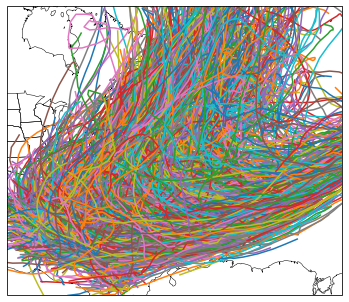

In [16]:
fig, ax = hurdat_storm_plotter(df)

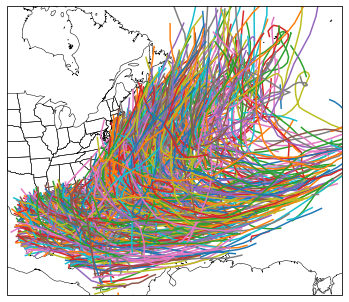

In [17]:
df_hu = df[df['Storm Status'] == 'HU']
#df_hu = df_hu[df_hu['Time'] > datetime(2020 - 30, 1, 1)]

fig, ax = hurdat_storm_plotter(df_hu)


In [18]:
def hurdat_storm_plotter_2(data_frame):
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(1, 1, 1, projection = plot_crs)
    ax.set_extent([-100, -37, 12, 52], data_crs)
    ax.coastlines('50m', edgecolor = 'black', linewidth = 0.5)
    ax.add_feature(cfeature.STATES, linewidth = 0.5)

    for storm_number in data_frame['Storm ID'].unique():
        storm_data = data_frame[data_frame['Storm ID'] == storm_number]
        track_len = len(storm_data)
        ax.plot(storm_data['Lon'], storm_data['Lat'], 
                transform=data_crs, color='blue', alpha=track_len/100)
    return fig, ax

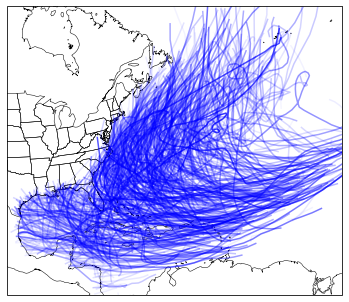

In [19]:
fig, ax = hurdat_storm_plotter_2(df_hu)

In [20]:
# s = ax.scatter(storm_data['Lon'], storm_data['Lat'], 
#               transform=data_crs, c=storm_data['Max Wind'], 
#               vmin=40, vmax=150, s=5, cmap='Reds')
# plt.colorbar(s)

In [21]:
#https://stackoverflow.com/questions/58276632/is-it-bad-practice-to-have-more-than-1-geometry-column-in-a-geodataframe
    
# import pandas as pd
# import geopandas
# from shapely.geometry import Point
# import matplotlib.pyplot as plt

# lats = [-34.58, -15.78, -33.45, 4.60, 10.48]
# lons = [-58.66, -47.91, -70.66, -74.08, -66.86]
# df = pd.DataFrame(
#     {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
#      'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
#      'Latitude': lats,
#      'Longitude': lons})

# df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
# df['Coordinates'] = df['Coordinates'].apply(Point)

# df['Coordinates_2'] = list(zip(lons[::-1], lats[::-1]))
# df['Coordinates_2'] = df['Coordinates_2'].apply(Point)

# gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')


# def get_distance(row):
#     distance = row.Coordinates.distance(row.Coordinates_2)
#     print(distance)
#     return distance

# gdf['distance'] = gdf.apply(lambda row: get_distance(row), axis=1)

In [22]:
points_gdf = gpd.GeoDataFrame(
                        df, geometry=gpd.points_from_xy(x=df.Lon, y=df['Lat'])
                      )
filt2       = points_gdf.Time.apply(lambda g: g.month == 9)
points_gdf = points_gdf.loc[filt2]
points_gdf

,Time,Record Identifier,Storm ID,Storm Name,Storm Status,Lat,Lon,Max Wind,Minimun Pressure,NE 34kt WindRadii,...,NW 34kt WindRadii,NE 50kt WindRadii,SE 50kt WindRadii,SW 50kt WindRadii,NW 50kt WindRadii,NE 60kt WindRadii,SE 60kt WindRadii,SW 60kt WindRadii,NW 60kt WindRadii,geometry
65,1851-09-13 00:00:00,,AL051851,UNNAMED,TS,32.5,-73.5,92.60,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,POINT (-73.50000 32.50000)
66,1851-09-13 06:00:00,,AL051851,UNNAMED,TS,32.5,-73.5,92.60,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,POINT (-73.50000 32.50000)
67,1851-09-13 12:00:00,,AL051851,UNNAMED,TS,32.5,-73.5,92.60,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,POINT (-73.50000 32.50000)
68,1851-09-13 18:00:00,,AL051851,UNNAMED,TS,32.5,-73.5,92.60,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,POINT (-73.50000 32.50000)
69,1851-09-14 00:00:00,,AL051851,UNNAMED,TS,32.5,-73.5,92.60,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,POINT (-73.50000 32.50000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52477,2020-09-18 06:00:00,,AL242020,ALPHA,SS,37.9,-11.4,83.34,996.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-11.40000 37.90000)
52478,2020-09-18 12:00:00,,AL242020,ALPHA,SS,38.9,-10.3,83.34,996.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-10.30000 38.90000)
52479,2020-09-18 18:00:00,,AL242020,ALPHA,SS,39.9,-9.1,83.34,996.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-9.10000 39.90000)
52480,2020-09-18 18:40:00,L,AL242020,ALPHA,SS,40.0,-8.9,83.34,996.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-8.90000 40.00000)


In [24]:
#https://gis.stackexchange.com/questions/202190/turning-geodataframe-of-x-y-coordinates-into-linestrings-using-groupby

a = 0.0001

track_gdf = points_gdf.groupby(['Storm ID'])['geometry'].apply(lambda x: LineString(x.tolist()) if x.size > 1 \
                                                    else LineString([(x.x, x.y), (x.x + a, x.y + a)]))
track_gdf = gpd.GeoDataFrame(track_gdf, geometry='geometry')

In [28]:
import cartopy.feature as cfeat
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from   matplotlib.pyplot import imread
class MapTemplate:
    def __init__(self, extent     = [-72, -68, 17.5, 20]):
        self.extent               = extent
        self.path                 = path               = '../shape_files/rd_shapes/vectores'
        #self.hispaniola_gdf       = hispaniola_gdf    = geopandas.read_file(f'{ self.path }/hispaniola.shp').to_crs("EPSG:4326")
        #self.municipios           = municipios        = geopandas.read_file(f'{ self.path }/División_Prov_Muni_y_Dist_MuniUTM.shp').to_crs("EPSG:4326")
        #self.limite_gdf           = limite_gdf        = geopandas.read_file(f'{ self.path }/limite_frontera.shp').to_crs("EPSG:4326")
        self.silueta_haiti_gdf    = silueta_haiti_gdf = geopandas.read_file(f'{ self.path }/silueta_haiti.shp').to_crs("EPSG:4326")
        self.silueta_rd_gdf       = silueta_rd_gdf    = geopandas.read_file(f'{ self.path }/silueta_rd.shp').to_crs("EPSG:4326")
        self.provincias_gdf       = provincias_gdf    = geopandas.read_file(f'{ self.path }/PROVINCIAS.shp').to_crs("EPSG:4326")
        #self.rios_gdf             = rios_gdf          = geopandas.read_file(f'{ self.path }/RIOS.shp').to_crs("EPSG:4326")
        #self.cuencas_hidro_gdf    = cuencas_hidro_gdf = geopandas.read_file(f'{ self.path }/Cuencas_Hidrograficas_RD.shp').to_crs("EPSG:4326")
        #self.cuencas_presas_gdf   = cuencas_presas_gdf= geopandas.read_file(f'{ self.path }/Presas-CuencasAporte.shp').to_crs("EPSG:4326")
        #self.states_provinces_gdf = geopandas.read_file(f'{self.path}/ne_10m_admin_1_states_provinces.shp')
        self.land_gdf             = geopandas.read_file(f'{self.path}/ne_10m_land.shp')
        #self.ocean_gdf            = geopandas.read_file(f'{self.path}/ne_10m_ocean.shp')
        self.coastline_gdf        = geopandas.read_file(f'{self.path}/ne_10m_coastline.shp')
        self.countries_gdf        = geopandas.read_file(f'{self.path}/ne_10m_admin_0_countries.shp')
        
        self.map_crs = ccrs.PlateCarree()
    data_crs= ccrs.PlateCarree()
        
    def base_map(self):
        fig = plt.figure(figsize=(20, 20))
        ax  = plt.subplot(1, 1, 1, projection = self.map_crs)

        ax.add_feature(cfeat.OCEAN.with_scale('10m'))

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='black', linestyle='--', zorder = 10000)
        gl.xlabels_bottom = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylocator = mticker.FixedLocator([0, 10, 20, 30, 40, 50, 55])
        gl.xlabel_style = {'weight': 'bold'}
        gl.ylabel_style = {'weight': 'bold'}
        
        logos = ['iglogo40x40', 'fblogo40x40', 'ttlogo50x50', 'onamet-150X43']
        x, y = 652, 13
        for logo in logos: 
            if logo == 'ttlogo50x50':
                y = y-5
            elif logo == 'onamet-150X43':
                x, y = 45, 13
            logo = imread(f'../{logo}.png')
            fig.figimage(logo, x, y, zorder=100)
            x = x + 170
        
        props = dict(boxstyle='round', facecolor='white', alpha=1)
        xtxt = [0.546, 0.549, 0.552, 0.555]
        ytxt = -0.64
        text = '       @onamet            @onamet             @onamet'
        for x in xtxt:
            ax.text(x, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
                weight = 'bold', color = 'blue')
        xtxt = 0.04
        ytxt = -0.67
        text = 'www.onamet.gob.do'
        ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=12, verticalalignment='top',
                weight = 'bold', color = 'red')
        props = dict(facecolor='whitesmoke')
        xtxt = 0.0055
        ytxt = -0.01
        a = 239*'.'
        text = f'''{a}\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n{a}'''
        ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=12, verticalalignment='top',
                weight = 'bold', color = 'b', bbox=props, zorder = -1)
        return fig, ax
        
    @classmethod    
    def zoomed_map(cls):
        _  = MapTemplate()
        fig, ax = _.base_map()
        ax.set_extent([-72, -68, 17.5, 20])
        ax.add_geometries(_.silueta_haiti_gdf['geometry'], crs=cls.data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5)
        ax.add_geometries(_.provincias_gdf['geometry'], crs=cls.data_crs, facecolor='honeydew',
                 edgecolor='black', linewidth=0.5)
        return fig, ax
    @classmethod     
    def wide_map(cls):
        _  = MapTemplate()
        fig, ax = _.base_map()
        ax.set_extent([-100, 0, 0, 40])
        #ax.stock_img()
#         ax.add_geometries(_.land_gdf['geometry'], crs=_.data_crs, facecolor='none',
#                               edgecolor='black', linewidth=1, alpha=0.7)
#         ax.add_geometries(_.coastline_gdf['geometry'], crs=_.data_crs, facecolor='none',
#                              edgecolor='black', linewidth=0.5)
        ax.add_geometries(_.countries_gdf['geometry'], crs=_.data_crs, facecolor='whitesmoke',
                             edgecolor='black', linewidth=0.5, zorder = 10, alpha = 0.7)
        return fig, ax

In [29]:
map_template = MapTemplate()

<AxesSubplot:>

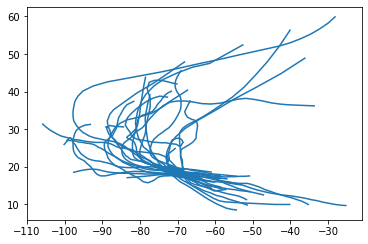

In [32]:
filt        = track_gdf.geometry.apply(lambda g: map_template.silueta_rd_gdf.intersects(g))
rd_hits_gdf = track_gdf.loc[filt[0]]
rd_hits_gdf = rd_hits_gdf.reset_index()
rd_hits_gdf.plot()

In [33]:
filt2       = df_hu.Time.apply(lambda g: g.month == 6)
_ = rd_hits_gdf.loc[filt2]
len(_['Storm ID'].unique())

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [34]:
_

<AxesSubplot:>

/home/jmedinah09/miniconda3/envs/unidata/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


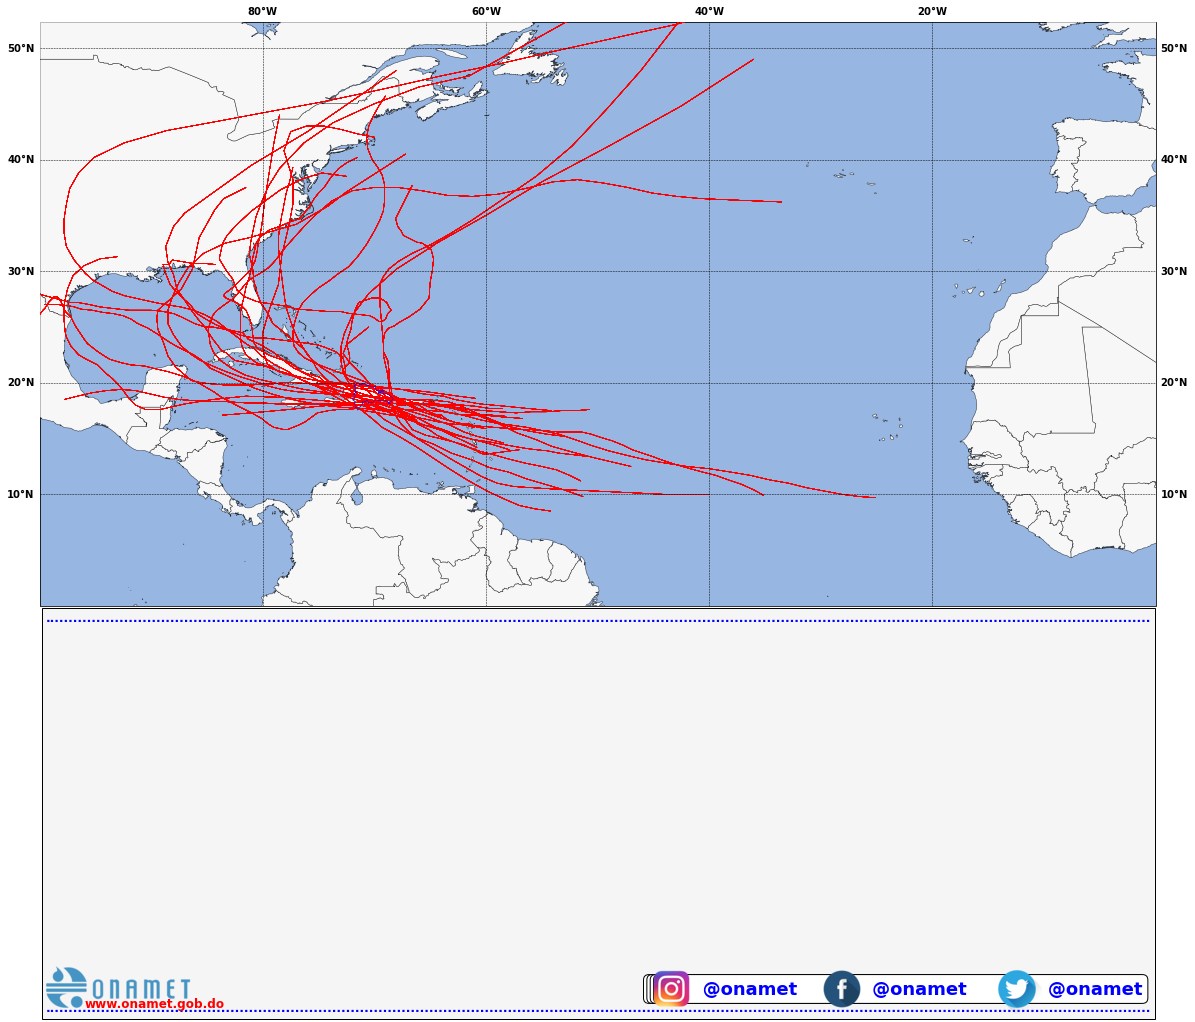

In [35]:
map_template = MapTemplate()
fig, ax = map_template.wide_map()
for storm_number in rd_hits_gdf['Storm ID']:
    storm_data = rd_hits_gdf[rd_hits_gdf['Storm ID'] == storm_number]
    ax.add_geometries(rd_hits_gdf['geometry'], crs=ccrs.PlateCarree(), facecolor='none',
                         edgecolor='red', linewidth=0.5, zorder = 100)
ax.add_geometries(map_template.silueta_rd_gdf['geometry'], crs=map_template.data_crs, facecolor='none',
                             edgecolor='b', linewidth=0.5, zorder = 1001, alpha = 0.7)

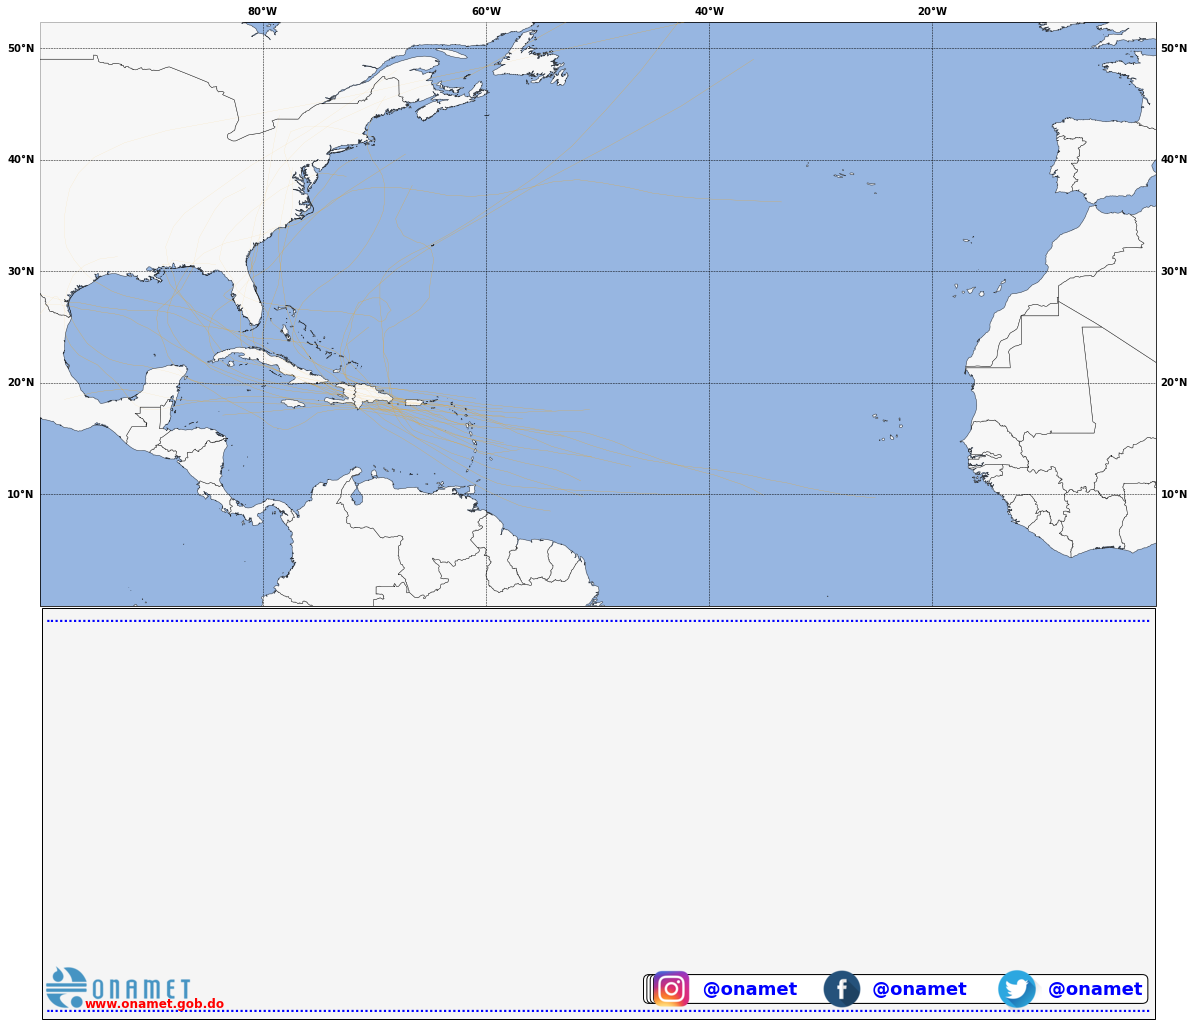

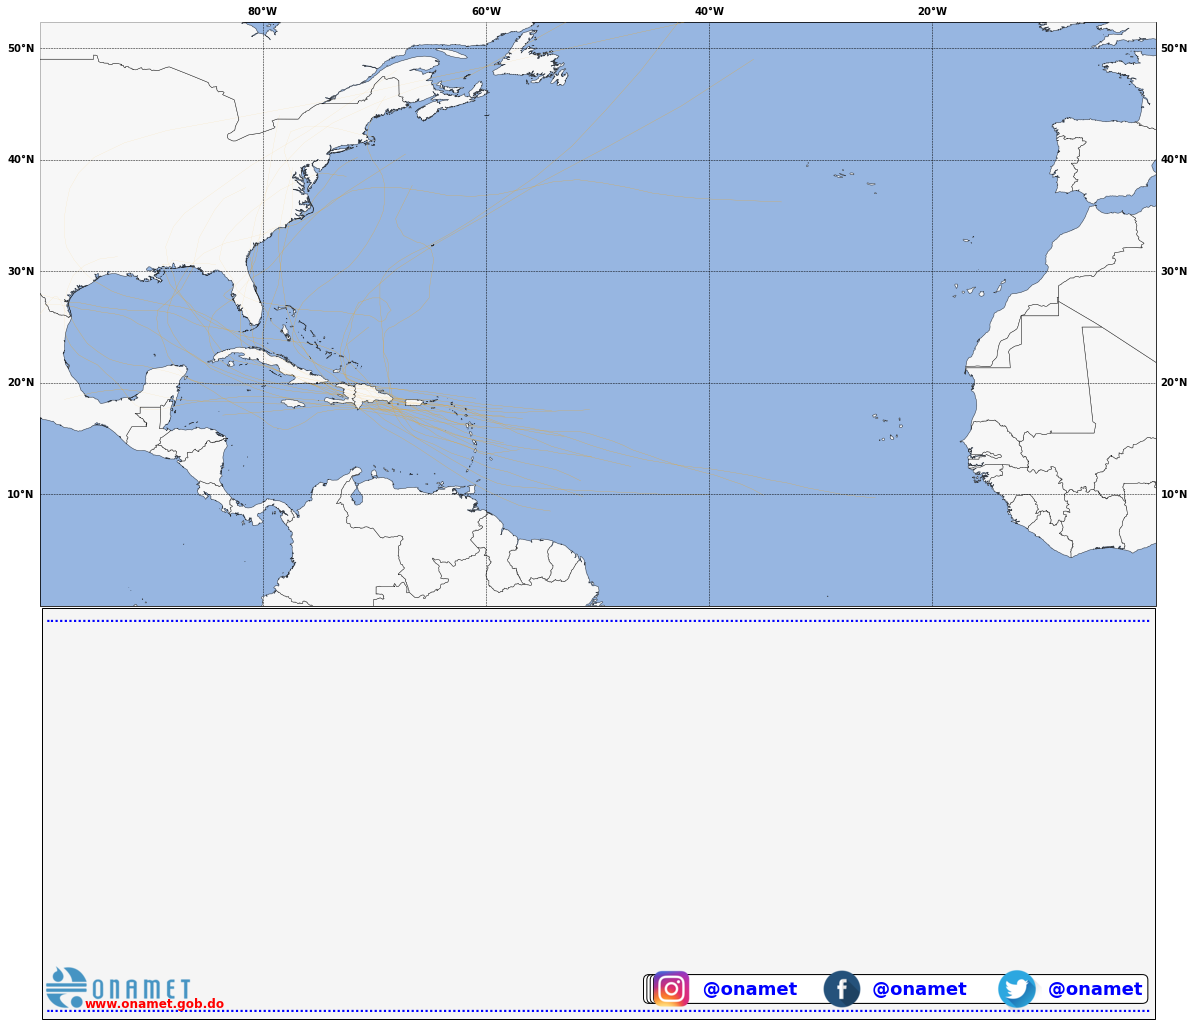

In [36]:
map_template = MapTemplate()
fig, ax = map_template.wide_map()



ax.add_geometries(rd_hits_gdf['geometry'], crs=ccrs.PlateCarree(), 
                  facecolor='none', edgecolor='orange', linewidth=0.2, 
                  zorder=5) 

#ax.plot(points_gdf['geometry'].x, points_gdf['geometry'].y, transform=data_crs)
fig

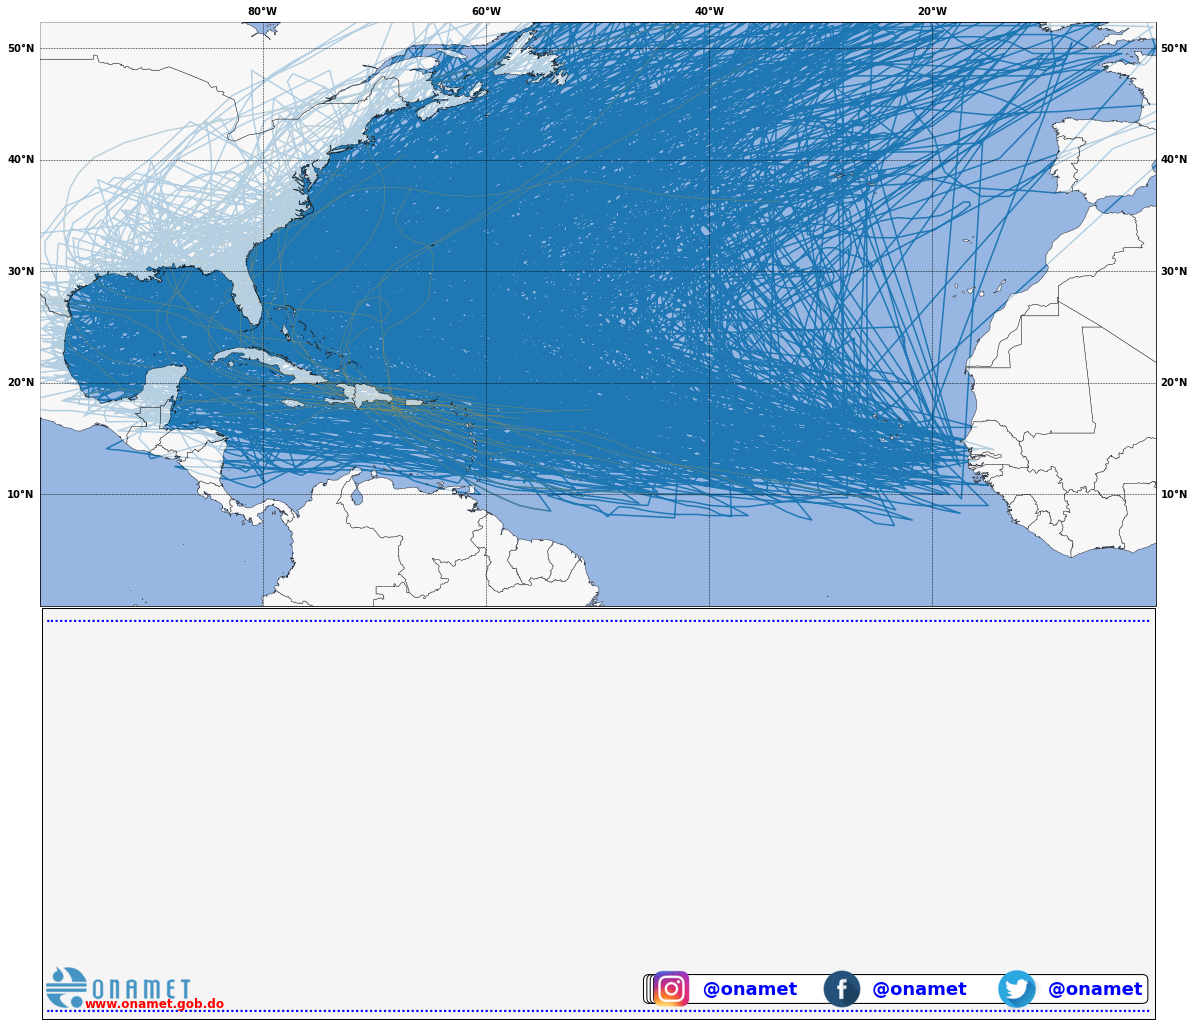

In [37]:
ax.plot(points_gdf['geometry'].x, points_gdf['geometry'].y, transform=data_crs)
fig

In [38]:
rd_hits_gdf

,Storm ID,geometry
0,AL011900,"LINESTRING (-66.40000 17.50000, -67.40000 17.6..."
1,AL021852,"LINESTRING (-64.10000 17.00000, -65.10000 17.4..."
2,AL021876,"LINESTRING (-58.50000 17.70000, -59.70000 17.7..."
3,AL021896,"LINESTRING (-66.00000 17.50000, -66.90000 18.1..."
4,AL021919,"LINESTRING (-61.00000 16.00000, -62.30000 16.3..."
5,AL021930,"LINESTRING (-58.40000 14.60000, -59.60000 14.9..."
6,AL031883,"LINESTRING (-57.90000 14.00000, -59.20000 14.4..."
7,AL031910,"LINESTRING (-58.30000 17.00000, -59.50000 17.1..."
8,AL031921,"LINESTRING (-40.00000 10.00000, -42.00000 10.0..."
9,AL041894,"LINESTRING (-50.50000 13.40000, -51.00000 13.4..."


In [39]:
#A function that generate svg hurricane markers
def svg_hurricane(hurricane_name, lat, lon, radius, color):
    return '''
    <circle cx="{lon}" cy="{lat}" r="{radius}" fill="{color}"/>
    <text x="{lon}" y="{lat}" text-anchor="middle" fill="black" font-size="10">{hurricane_name}</text>
    '''.format(hurricane_name=hurricane_name, lat=lat, lon=lon, radius=radius, color=color)

In [40]:
svg_hurricane('Jose', 17.2, 45.3, 0.5, 'blue')

'\n    <circle cx="45.3" cy="17.2" r="0.5" fill="blue"/>\n    <text x="45.3" y="17.2" text-anchor="middle" fill="black" font-size="10">Jose</text>\n    '